In [27]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 18 18:59:11 2021

@author: pimi
"""
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from datetime import datetime
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

curDir=globals()['_dh'][0]
df=pd.read_csv(curDir+'//test.csv')
summerStart='2020/04/01'
summerEnd='2020/10/30'

In [28]:
df.describe()

,Unnamed: 0,DATA,weight
count,216488.000000,216488.000000,216488.000000
mean,108243.500000,50.524023,5.927558
std,62494.846876,152.606752,69.994141
min,0.000000,0.000000,0.001000
25%,54121.750000,7.780000,1.000000
50%,108243.500000,15.000000,1.000000
75%,162365.250000,33.600000,1.000000
max,216487.000000,9820.000000,1000.000000


In [15]:
df.head()

,Unnamed: 0,PART,ID,DATE,DATA,RESULT,CLASS,REMARK,DESCRIPTION1,FOOT,weight
0,0,5321,178255,2020-01-02,17.0,PASS,生產早班,NaN,NaN,L,1.0
1,1,552B,199214,2020-01-02,93.5,PASS,生產早班,NaN,NaN,R,1.0
2,2,552A,880984,2020-01-02,88.1,PASS,生產早班,NaN,NaN,R,1.0
3,3,552D,199259,2020-01-02,13.4,PASS,生產早班,NaN,NaN,R,1.0
4,4,5513,199154,2020-01-02,46.5,PASS,生產早班,NaN,NaN,R,1.0


In [29]:
#%%
#資料清理(去除極端值)
df['REMARK']=df['REMARK'].fillna(0)
df=df[df['REMARK']==0]
#日期處理
df['DATE']=df['DATE'].apply(lambda x:datetime.strptime(x, "%Y-%m-%d"))
#刪除測試值大於2000的資料（極端值）
df=df[df['DATA']<=2000]
#刪除測試次數小於30的人
df_valuesCounts=df['ID'].value_counts().reset_index()
df_valuesCounts.columns=['ID','TEST_QTY']
df=pd.merge(df,df_valuesCounts,how='left',on='ID')
df=df[df['TEST_QTY']>300]
#列出參與測試的人員工號
list_ID=list(df['ID'].drop_duplicates())

In [30]:
df.describe()

,Unnamed: 0,DATA,weight,TEST_QTY
count,136045.000000,136045.000000,136045.000000,136045.000000
mean,140218.723128,36.765614,4.068596,393.678320
std,43362.078665,106.198380,55.289944,45.933559
min,65536.000000,0.000000,0.001000,304.000000
25%,102776.000000,7.360000,1.000000,353.000000
50%,139865.000000,13.200000,1.000000,406.000000
75%,177521.000000,25.600000,1.000000,423.000000
max,216487.000000,2000.000000,1000.000000,676.000000


In [17]:
df.head()

,Unnamed: 0,PART,ID,DATE,DATA,RESULT,CLASS,REMARK,DESCRIPTION1,FOOT,weight,TEST_QTY
63314,65536,5712,157305,2020-04-24,26.30,PASS,生產早班,0,NaN,L,1.0,356
63315,65537,7731,911810,2020-04-24,36.20,PASS,彈性早班,0,NaN,L,1.0,339
63316,65538,5531,952963,2020-04-24,38.30,PASS,生產早班,0,NaN,R,1.0,342
63317,65539,551D,199189,2020-04-24,22.10,PASS,生產早班,0,NaN,L,1.0,426
63318,65540,552F,199266,2020-04-24,6.23,PASS,生產早班,0,NaN,L,1.0,377


In [19]:
df_ori=df.copy()
#np.log1p去極值=ln(x+1),以e為底數的log(x)
df['DATA']=np.log1p(df['DATA'])


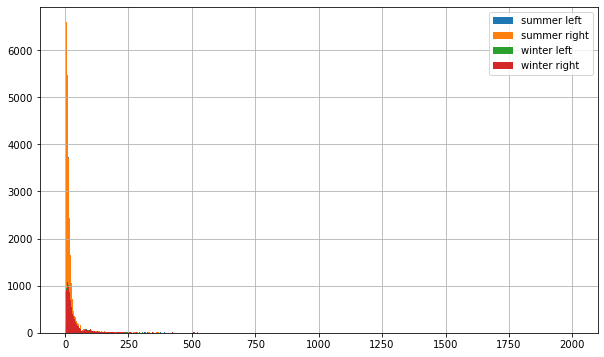

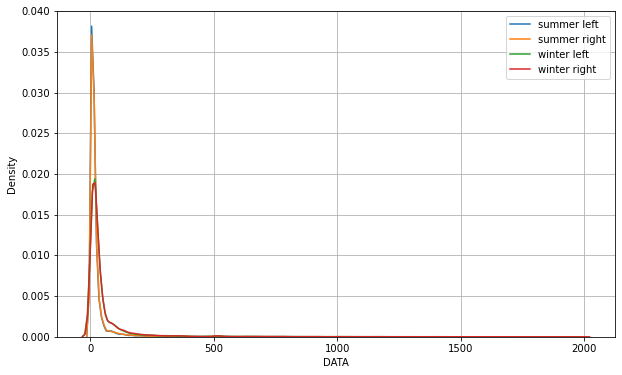

In [20]:
#冬夏天資料集
df_oriA=df_ori[(df_ori['DATE']>summerStart)&(df_ori['DATE']<summerEnd)]#夏天
df_oriB=df_ori[(df_ori['DATE']<summerStart)|(df_ori['DATE']>summerEnd)]#冬天

#左右腳
df_oriL=df_ori[(df_ori['FOOT']=='L')]
df_oriR=df_ori[(df_ori['FOOT']=='R')]

#冬夏左右腳
df_oriSL=df_ori[(df_ori['DATE']>summerStart)&(df_ori['DATE']<summerEnd)][(df_ori['FOOT']=='L')]#夏天左腳
df_oriSR=df_ori[(df_ori['DATE']>summerStart)&(df_ori['DATE']<summerEnd)][(df_ori['FOOT']=='R')]#夏天右腳
df_oriWL=df_ori[(df_ori['DATE']<summerStart)|(df_ori['DATE']>summerEnd)][(df_ori['FOOT']=='L')]#冬天左腳
df_oriWR=df_ori[(df_ori['DATE']<summerStart)|(df_ori['DATE']>summerEnd)][(df_ori['FOOT']=='R')]#冬天右腳

plt.figure(figsize=(10,6))
plt.hist(df_oriSL['DATA'],bins=1000)
plt.hist(df_oriSR['DATA'],bins=1000)
plt.hist(df_oriWL['DATA'],bins=1000)
plt.hist(df_oriWR['DATA'],bins=1000)    
plt.legend(['summer left','summer right','winter left','winter right'])
plt.grid()
plt.show()

plt.figure(figsize=(10,6))
sns.kdeplot(df_oriSL['DATA'],kernel='gau',bw_adjust=0.5)
sns.kdeplot(df_oriSR['DATA'],kernel='gau',bw_adjust=0.5)
sns.kdeplot(df_oriWL['DATA'],kernel='gau',bw_adjust=0.5)
sns.kdeplot(df_oriWR['DATA'],kernel='gau',bw_adjust=0.5)
plt.legend(['summer left','summer right','winter left','winter right'])     
plt.grid()
plt.show()

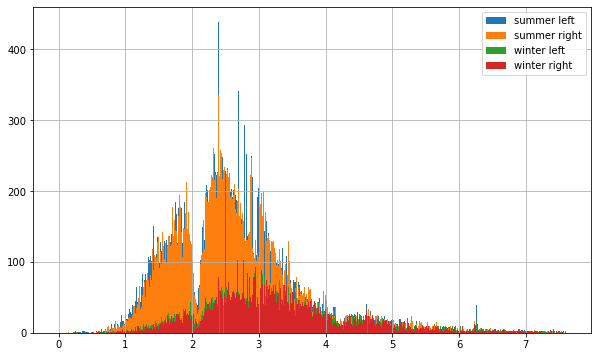

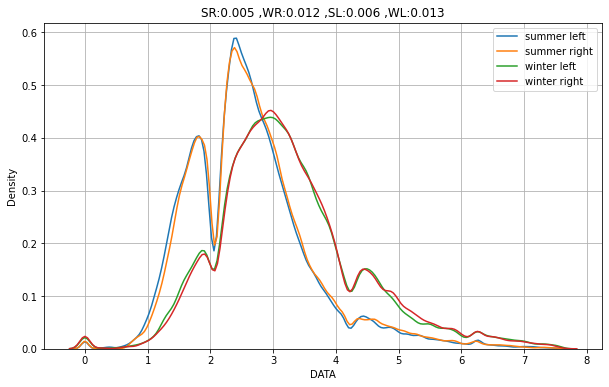

In [21]:
#冬夏天資料集
df_A=df[(df['DATE']>summerStart)&(df['DATE']<summerEnd)]#夏天
df_B=df[(df['DATE']<summerStart)|(df['DATE']>summerEnd)]#冬天

#左右腳
df_L=df[(df['FOOT']=='L')]
df_R=df[(df['FOOT']=='R')]

#冬夏左右腳
df_SL=df[(df['DATE']>summerStart)&(df['DATE']<summerEnd)][(df['FOOT']=='L')]#夏天左腳
df_SR=df[(df['DATE']>summerStart)&(df['DATE']<summerEnd)][(df['FOOT']=='R')]#夏天右腳
df_WL=df[(df['DATE']<summerStart)|(df['DATE']>summerEnd)][(df['FOOT']=='L')]#冬天左腳
df_WR=df[(df['DATE']<summerStart)|(df['DATE']>summerEnd)][(df['FOOT']=='R')]#冬天右腳

plt.figure(figsize=(10,6))
plt.hist(df_SL['DATA'],bins=1000)
plt.hist(df_SR['DATA'],bins=1000)
plt.hist(df_WL['DATA'],bins=1000)
plt.hist(df_WR['DATA'],bins=1000) 
plt.legend(['summer left','summer right','winter left','winter right'])     
plt.grid()
plt.show()
plt.figure(figsize=(10,6))
sns.kdeplot(df_SL['DATA'],kernel='gau',bw_adjust=0.5)
sns.kdeplot(df_SR['DATA'],kernel='gau',bw_adjust=0.5)
sns.kdeplot(df_WL['DATA'],kernel='gau',bw_adjust=0.5)
sns.kdeplot(df_WR['DATA'],kernel='gau',bw_adjust=0.5)
prob_SR=abs((1-scipy.stats.gaussian_kde(df_SR['DATA']).integrate_box_1d(low=0.69314,high=6.908)).round(3))
prob_WR=abs((1-scipy.stats.gaussian_kde(df_WR['DATA']).integrate_box_1d(low=0.69314,high=6.908)).round(3))
prob_SL=abs((1-scipy.stats.gaussian_kde(df_SL['DATA']).integrate_box_1d(low=0.69314,high=6.908)).round(3))
prob_WL=abs((1-scipy.stats.gaussian_kde(df_WL['DATA']).integrate_box_1d(low=0.69314,high=6.908)).round(3))

plt.title('SR:'+str(prob_SR)+
                  ' ,WR:'+str(prob_WR)+
                  ' ,SL:'+str(prob_SL)+
                  ' ,WL:'+str(prob_WL))
plt.legend(['summer left','summer right','winter left','winter right'])     
plt.grid()
plt.show()


In [22]:
#計算人員異常發生機率
df_prob=pd.DataFrame()
for ID in list_ID:
    SR=df_SR[df_SR['ID']==ID]['DATA']
    WR=df_WR[df_WR['ID']==ID]['DATA']
    SL=df_SL[df_SL['ID']==ID]['DATA']
    WL=df_WL[df_WL['ID']==ID]['DATA']
    prob_SR=abs((1-scipy.stats.gaussian_kde(SR).integrate_box_1d(low=0.69314,high=6.908)).round(3))
    prob_WR=abs((1-scipy.stats.gaussian_kde(WR).integrate_box_1d(low=0.69314,high=6.908)).round(3))
    prob_SL=abs((1-scipy.stats.gaussian_kde(SL).integrate_box_1d(low=0.69314,high=6.908)).round(3))
    prob_WL=abs((1-scipy.stats.gaussian_kde(WL).integrate_box_1d(low=0.69314,high=6.908)).round(3))
    list_prob=[ID,len(df[df['ID']==ID]),prob_SR,prob_WR,prob_SL,prob_WL]
    df_prob=df_prob.append([list_prob])

    

df_prob.columns=['ID','QTY','P_SR','P_WR','P_SL','P_WL']
df_prob.head()

,ID,QTY,P_SR,P_WR,P_SL,P_WL
0,157305,356,0.0,0.093,0.0,0.044
0,911810,339,0.0,0.011,0.0,0.006
0,952963,342,0.0,0.000,0.0,0.000
0,199189,426,0.0,0.010,0.0,0.000
0,199266,377,0.0,0.005,0.0,0.000


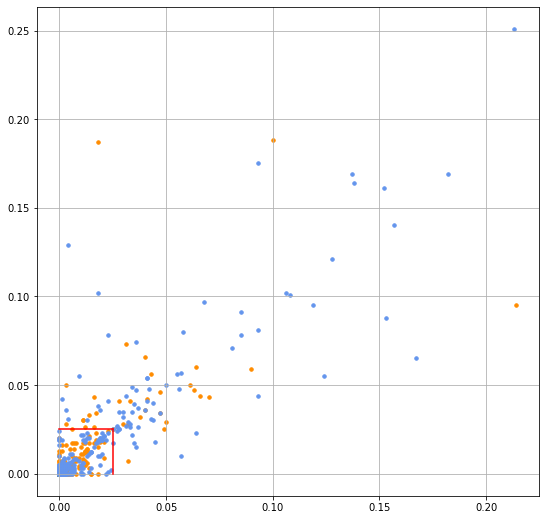

In [23]:
#%%    
#所有人員機率散布圖
plt.figure(figsize=(9,9))
plt.scatter(df_prob['P_SR'],df_prob['P_SL'],color='darkorange',s=12)
plt.scatter(df_prob['P_WR'],df_prob['P_WL'],color='cornflowerblue',s=12)
plt.plot([0.025,0],[0.025,0.025],color='red')
plt.plot([0.025,0.025],[0,0.025],color='red')
plt.grid()
plt.show()


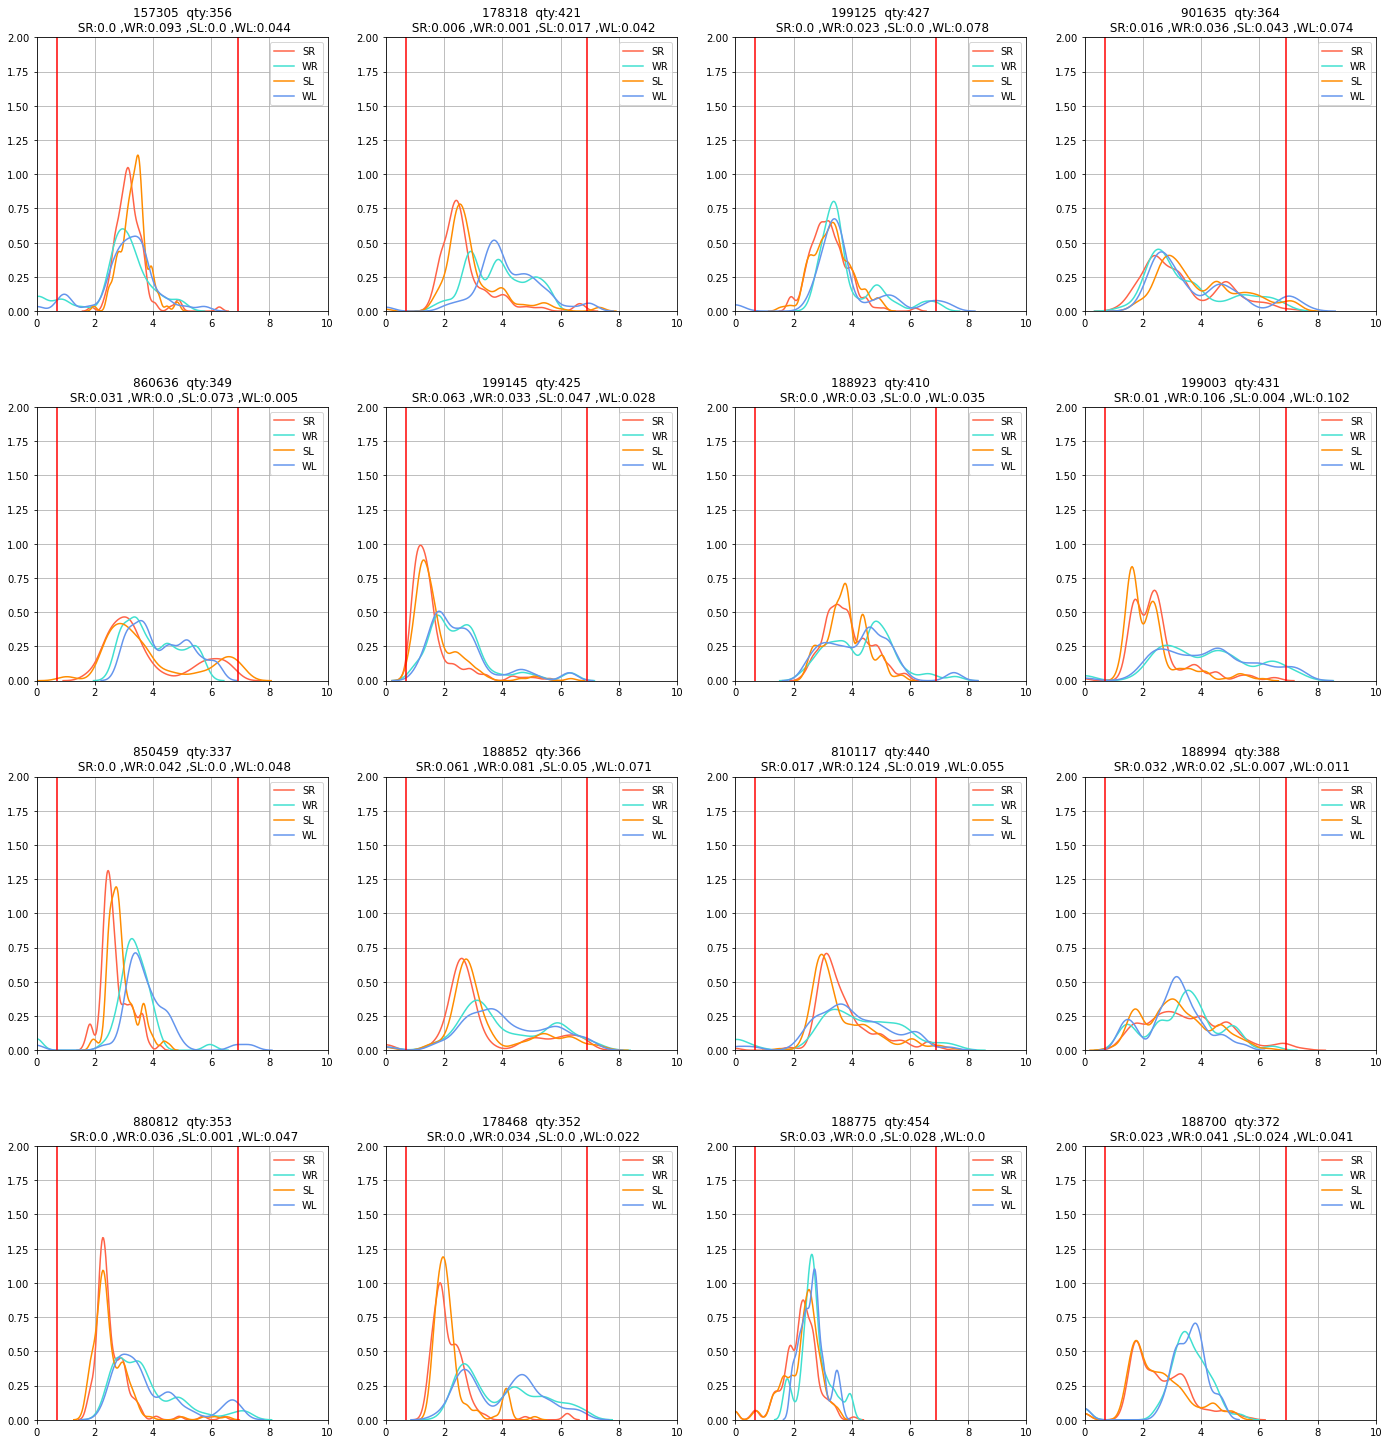

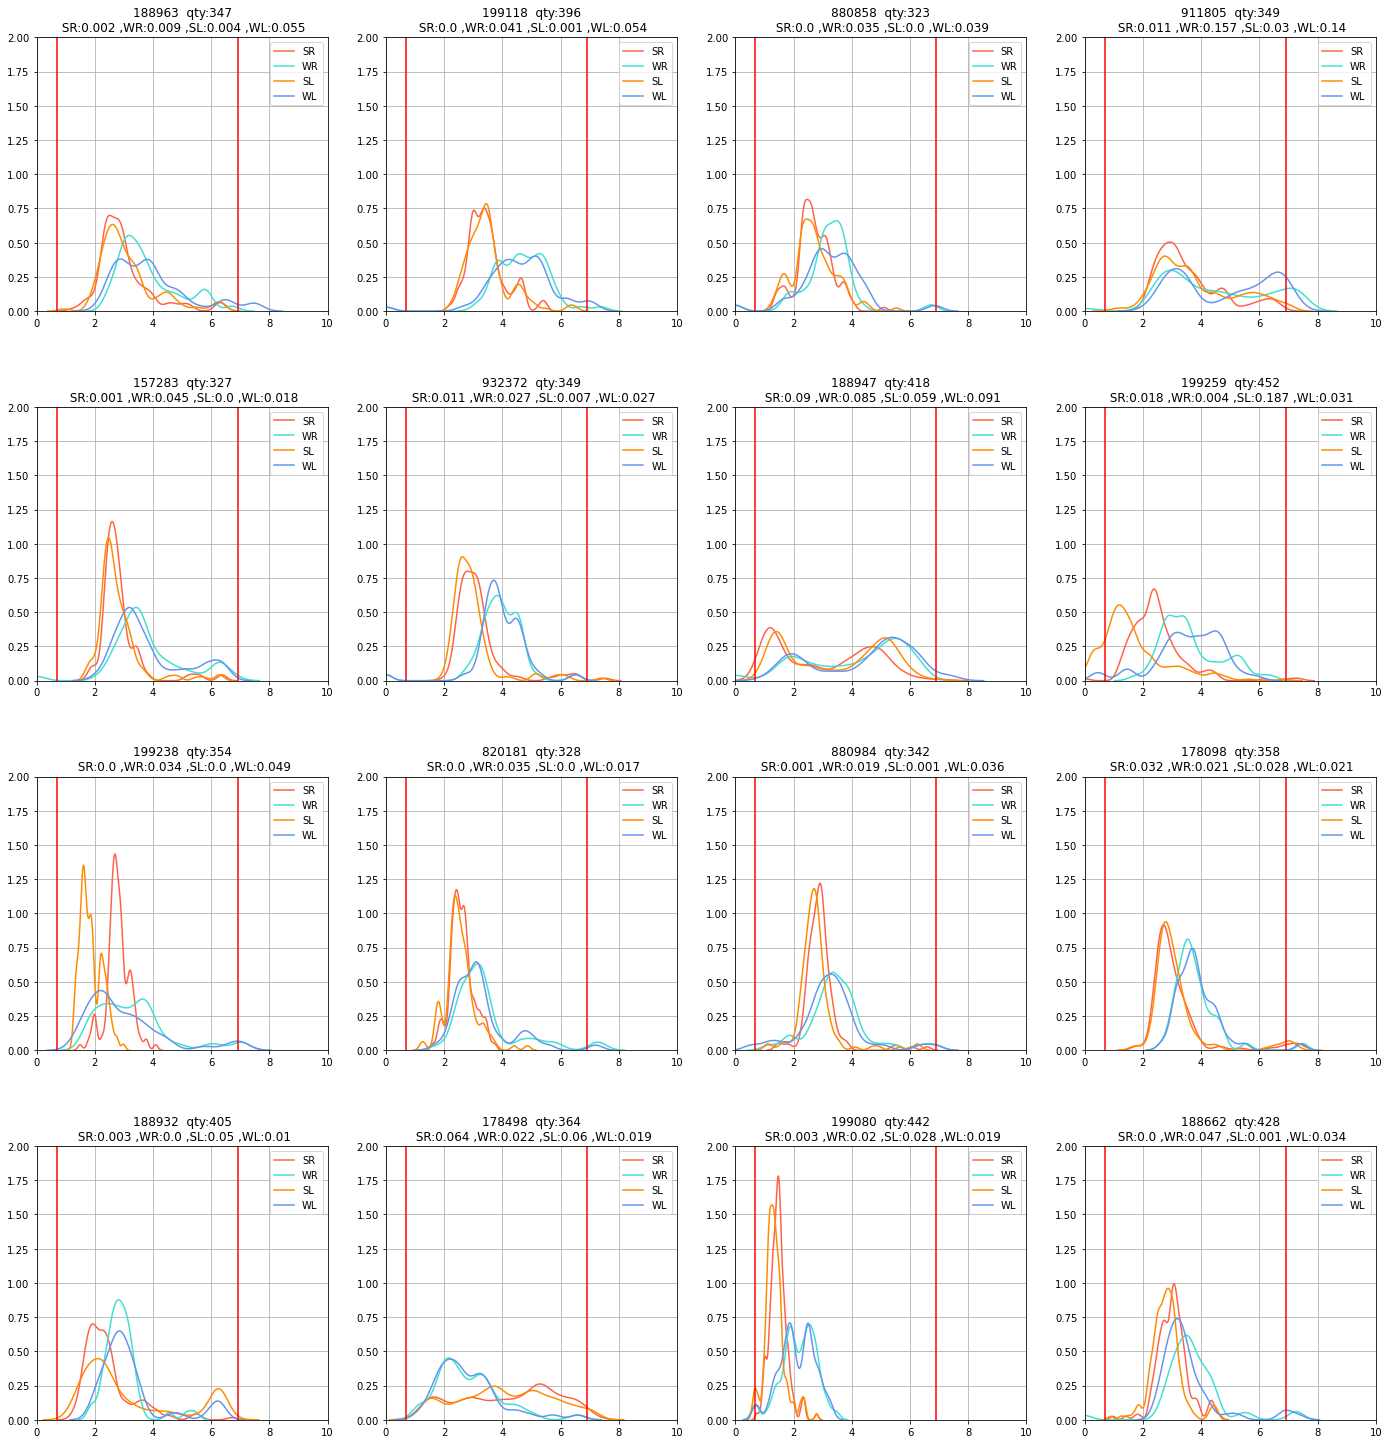

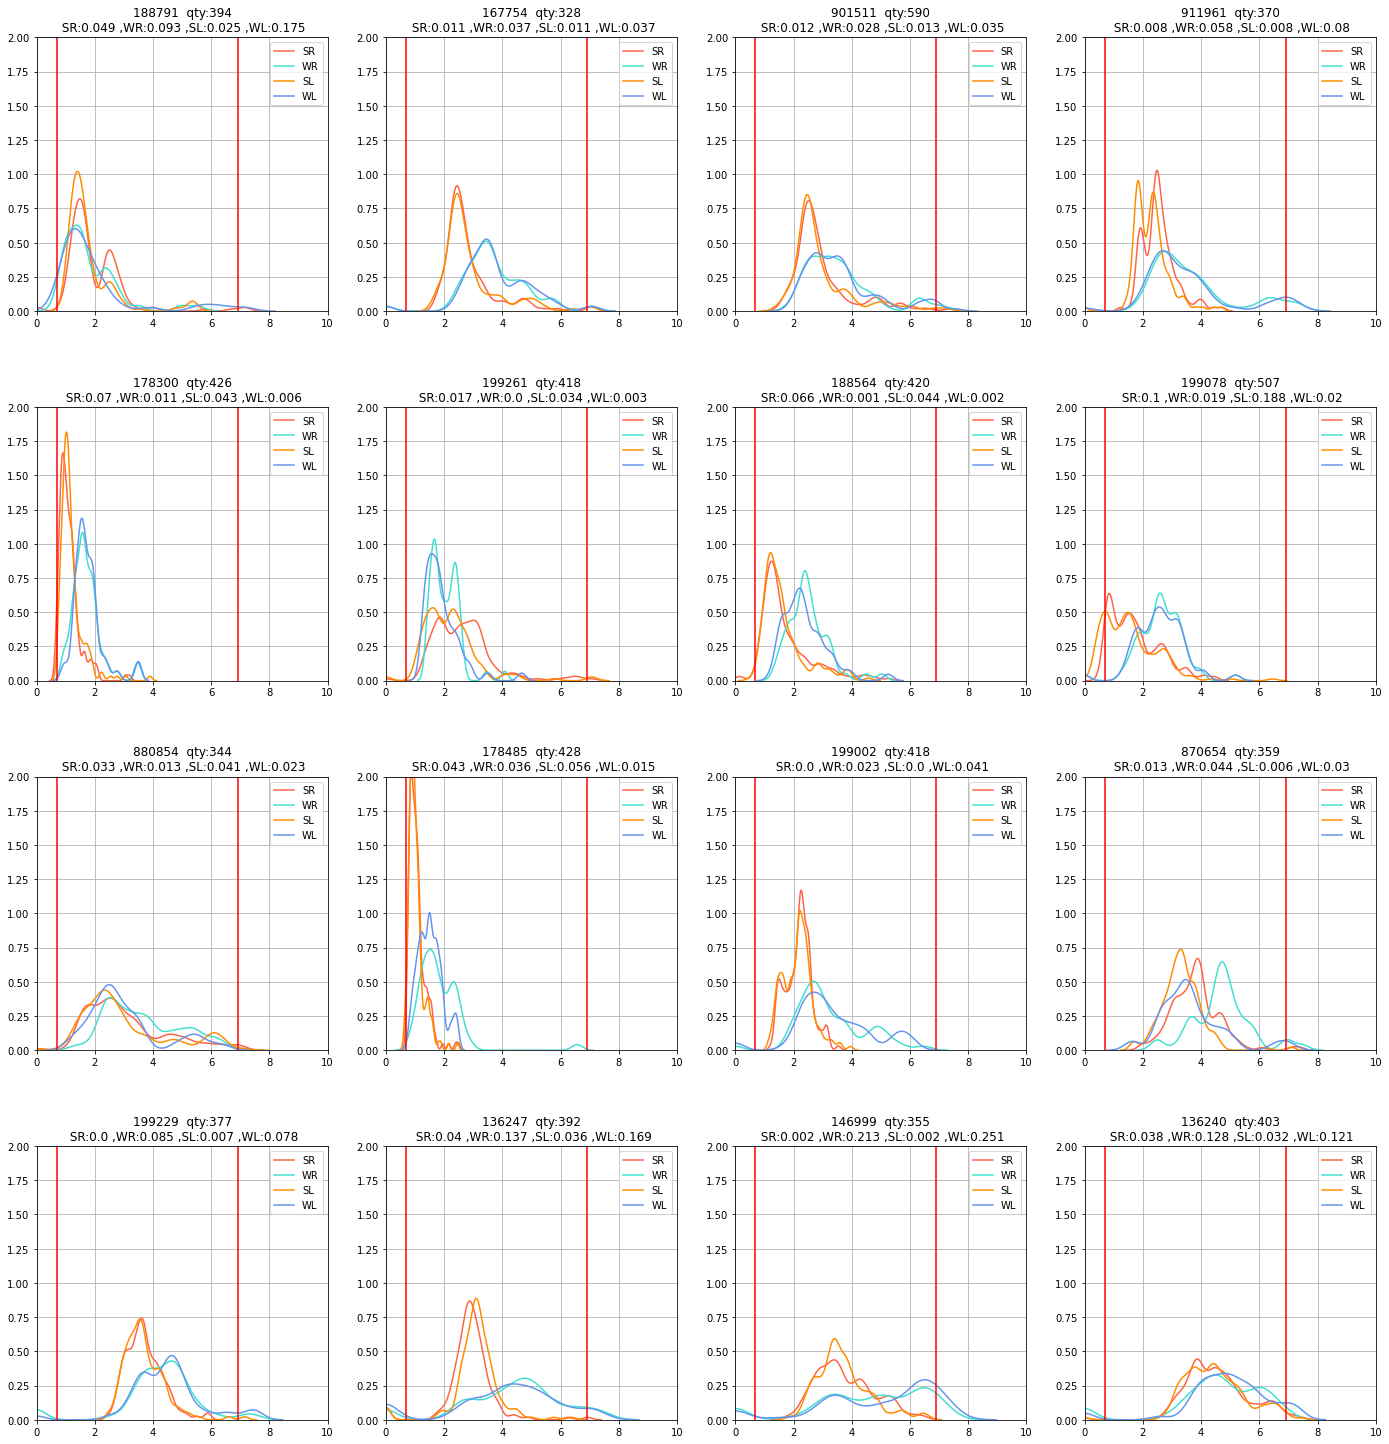

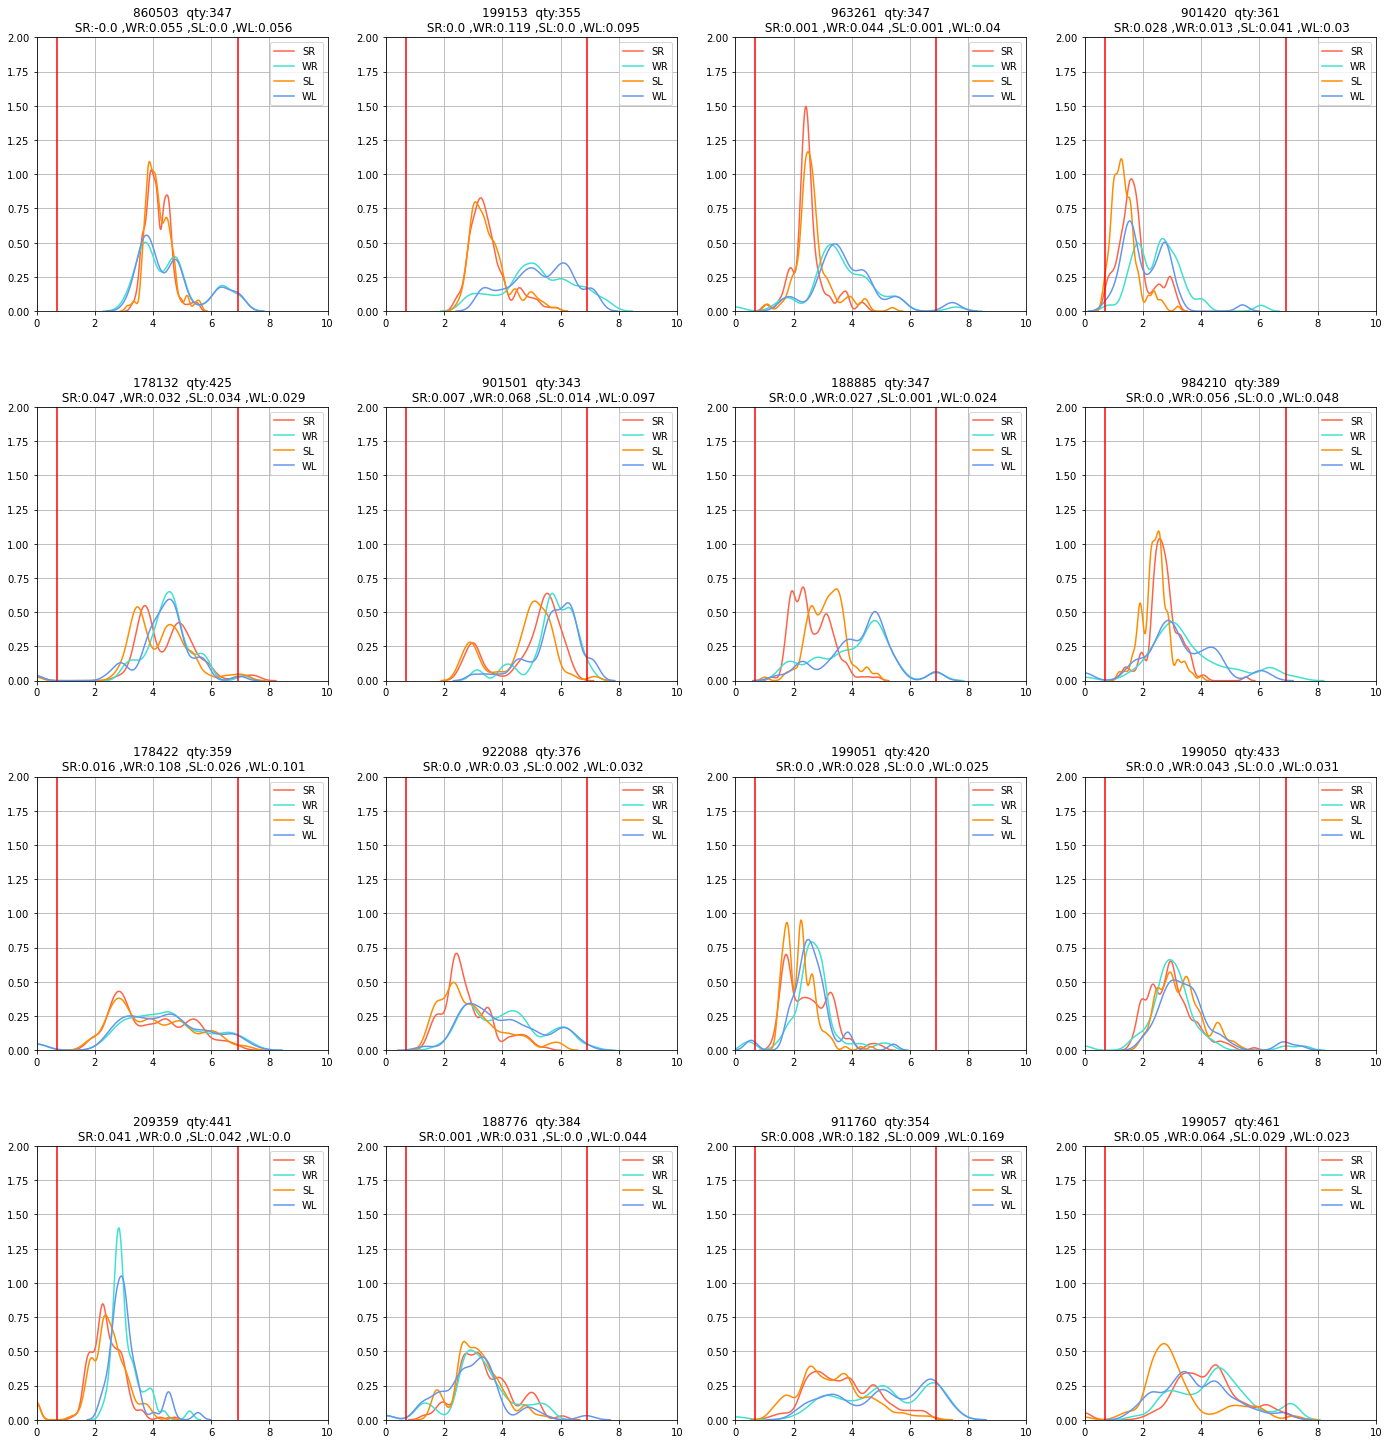

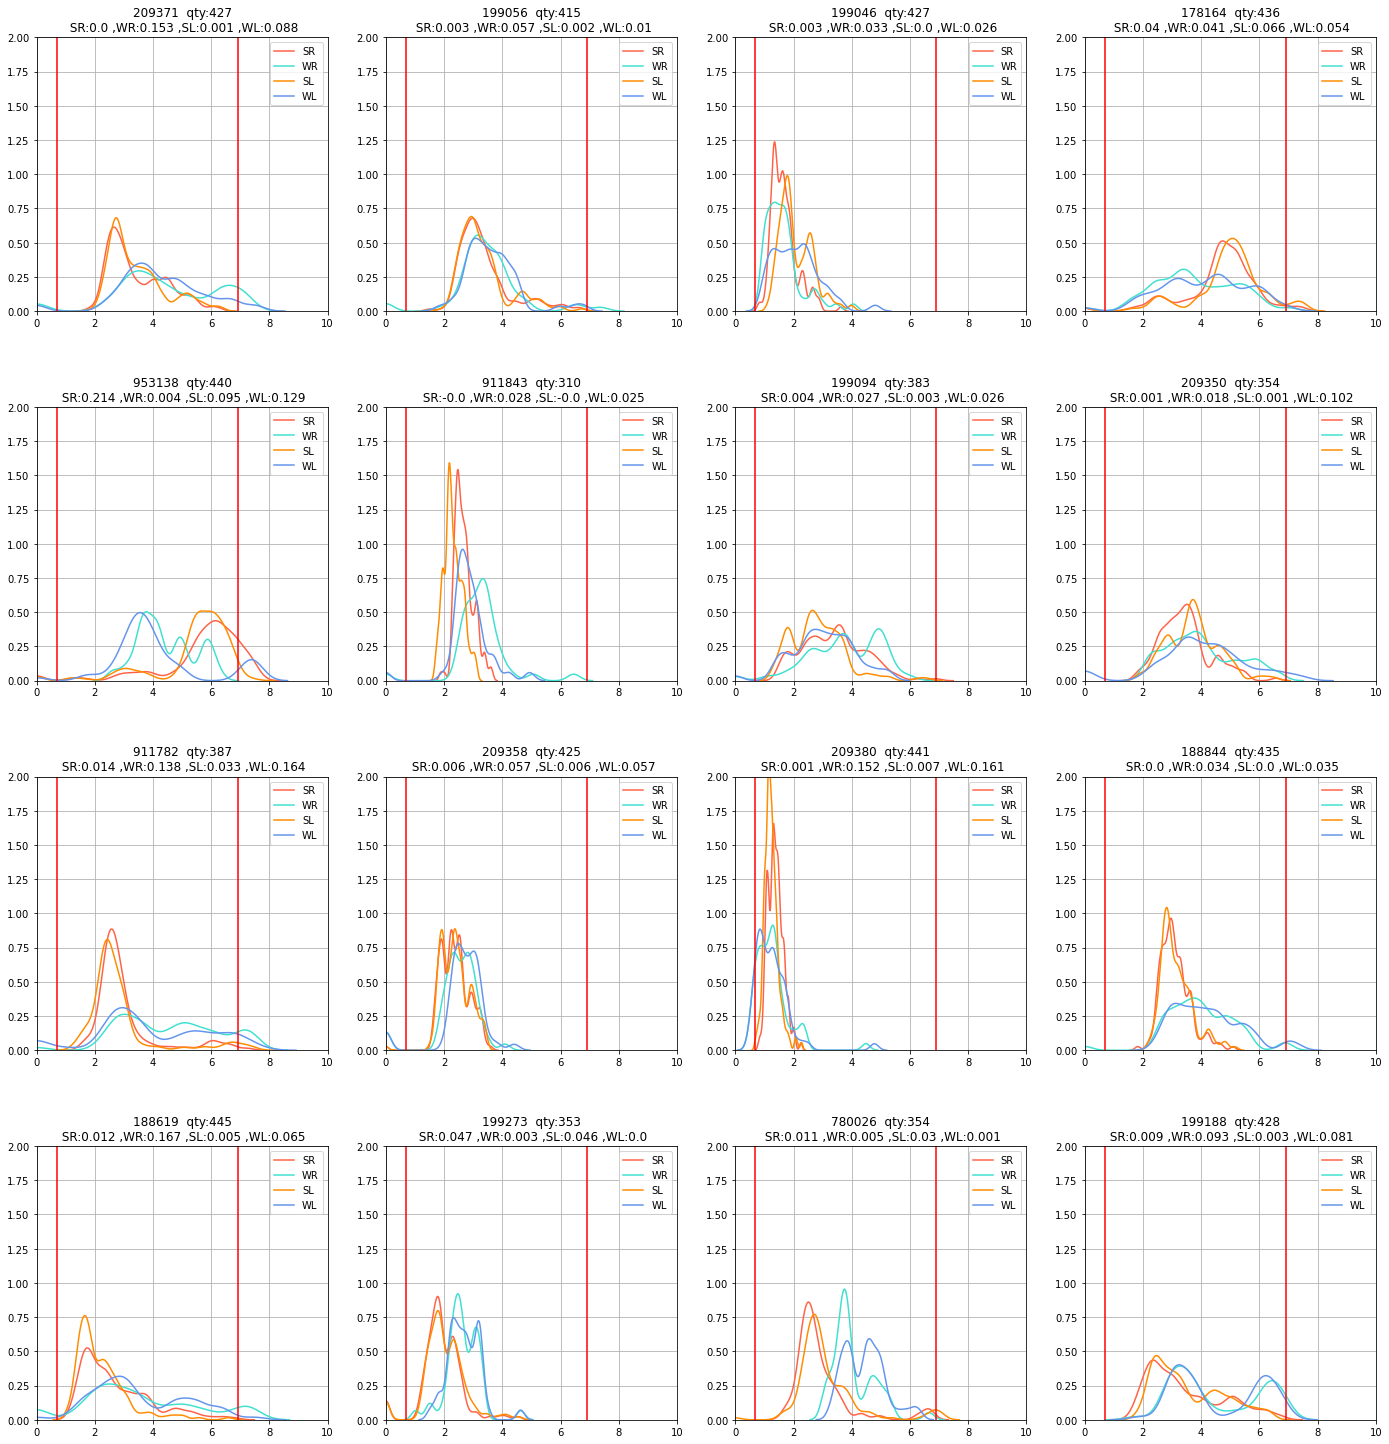

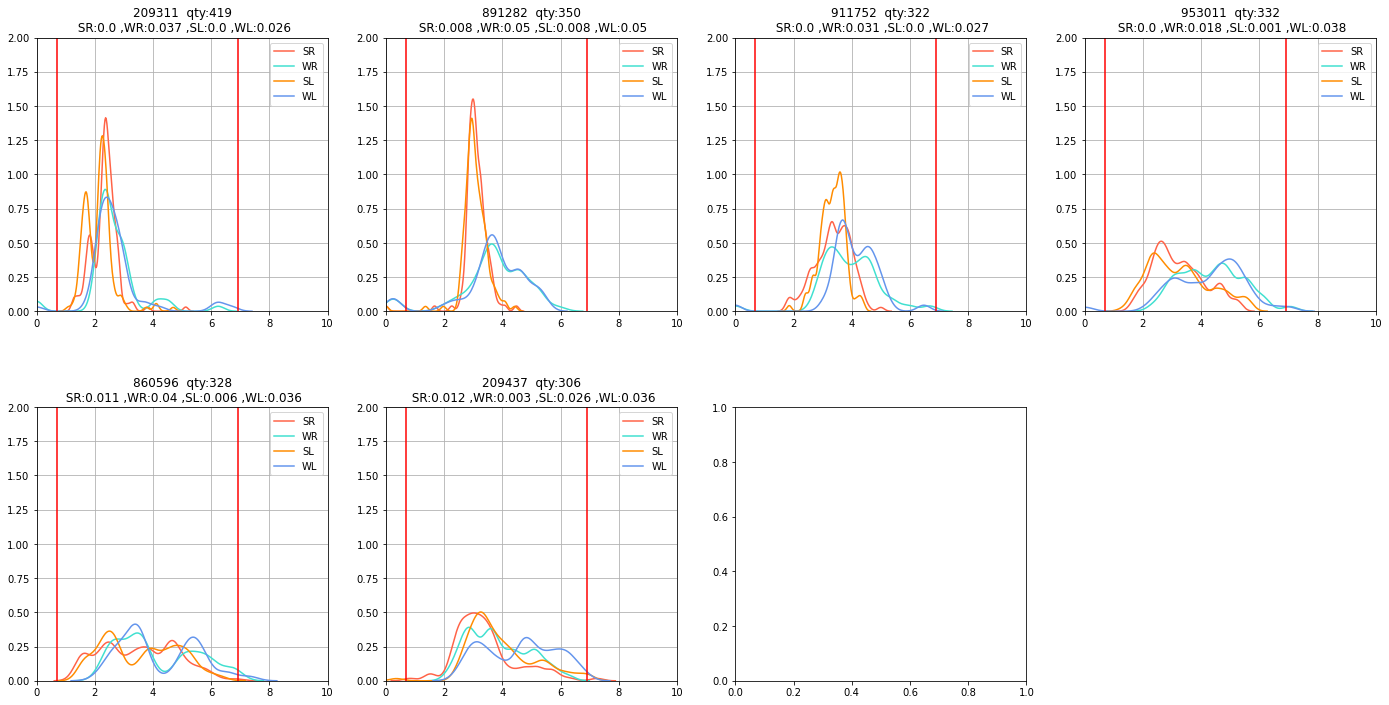

In [25]:
#繪製所有人員異常分佈子圖
df_probFail=df_prob[(df_prob['P_SR']>0.025)|
                    (df_prob['P_WR']>0.025)|
                    (df_prob['P_SL']>0.025)|
                    (df_prob['P_WL']>0.025)]

list_failID=list(df_probFail['ID'])
for i in range(math.ceil(len(list_failID)/16)):
    plt.figure(figsize=(24,24))
    for j in range(16):
        plt.subplot(4,4,j+1)
        try:
            ID=list_failID[i*16+j]
        except:
            break
        #kde plot
        plt.xlim(0,10)
        plt.ylim(0,2)
        
        SR=df_SR[df_SR['ID']==ID]['DATA']
        WR=df_WR[df_WR['ID']==ID]['DATA']
        SL=df_SL[df_SL['ID']==ID]['DATA']
        WL=df_WL[df_WL['ID']==ID]['DATA']
        sns.kdeplot(SR,kernel='gau',bw_adjust=0.5,color='tomato')
        sns.kdeplot(WR,kernel='gau',bw_adjust=0.5,color='turquoise')
        sns.kdeplot(SL,kernel='gau',bw_adjust=0.5,color='darkorange')
        sns.kdeplot(WL,kernel='gau',bw_adjust=0.5,color='cornflowerblue')
        # sns.distplot(df_AR[df_AR['ID']==ID]['DATA'], hist=False, fit='norm') #擬合標準正態分布
        prob_SR=(1-scipy.stats.gaussian_kde(SR).integrate_box_1d(low=0.69314,high=6.908)).round(3)
        prob_WR=(1-scipy.stats.gaussian_kde(WR).integrate_box_1d(low=0.69314,high=6.908)).round(3)
        prob_SL=(1-scipy.stats.gaussian_kde(SL).integrate_box_1d(low=0.69314,high=6.908)).round(3)
        prob_WL=(1-scipy.stats.gaussian_kde(WL).integrate_box_1d(low=0.69314,high=6.908)).round(3)

        #ln(1000+1)=6.908
        plt.plot([6.908,6.908],[0,10],color='red')
        plt.plot([0.6931,0.6931],[0,10],color='red')
        plt.title(str(ID)+'  qty:'+str(len(df[df['ID']==ID]))+
                  '\n SR:'+str(prob_SR)+
                  ' ,WR:'+str(prob_WR)+
                  ' ,SL:'+str(prob_SL)+
                  ' ,WL:'+str(prob_WL))
        plt.legend(['SR','WR','SL','WL'])
        plt.xlabel('')
        plt.ylabel('')
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
        plt.grid()
        #print(i*16+j)
    plt.show()